For Q1 and Q2, you need to use IRIS dataset available at - https://archive.ics.uci.edu/ml/datasets/iris

Q1. Implement two perceptron model to perform classification on iris database from scratch. You should not be using any inbuilt function for this implementation (except reading the data). 
(a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. 
(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a))

Q2. Implement a 3-class backpropagation NNet on your own to classify iris data, i.e. from scratch. You should not be using any inbuilt function for this implementation (except reading the data). 
(a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. 
(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a))
(c) add L2 regularization - show the comparisons with and without this regularization and analyze your results. 

Q3. Use any toolbox in python and implement RBF NNet to solve one of the problems/databases (of your choice from the UCI ML database Repo). Analyze your results with respect to varying learning rate and epochs. You are not allowed to use someone's code available online. UCI databases: https://archive.ics.uci.edu/ml/datasets.php

Q4. Using MNIST database, code Autoencoder model with three encoding and three decoding layers. Show the visualization of the feature maps. On the features, add a classifier to perform 10-class classification and show the training loss curve and test accuracy. 

In [ ]:
# Date: 14th December 2020
# importing pandas and reading dataset from github
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

Understanding the dataset:

Firstly, we have the value which is going to be predicted is Species. That is either 

-- Iris Setosa

-- Iris Versicolour

-- Iris Virginica

This makes it a 3 class problem. 

In addition to that, we will start brushing up the visualizations from ML1. Then with further steps we shall perform required tasks.

**Task 0**: Visualization of the iris dataset

Image ref: https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png

 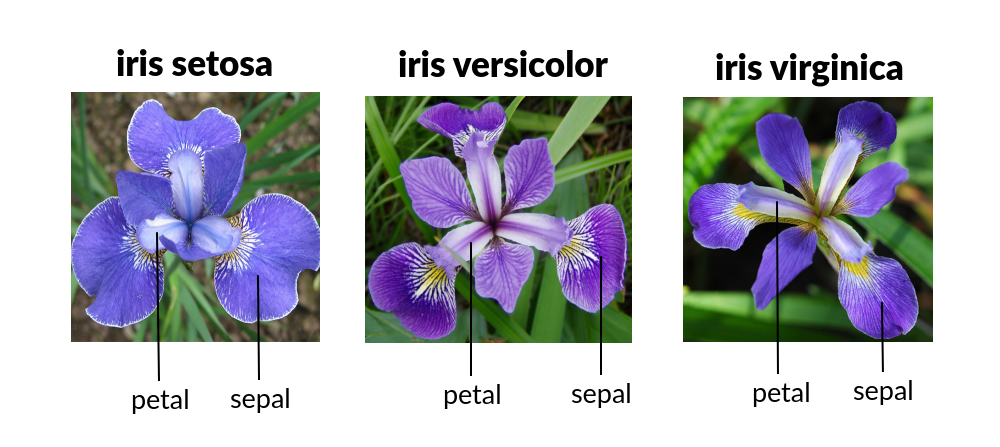

Visualizing the bar plots will let us know the rough idea about how the SepalLengthCm,	SepalWidthCm,	PetalLengthCm and	PetalWidthCm varies with Species.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


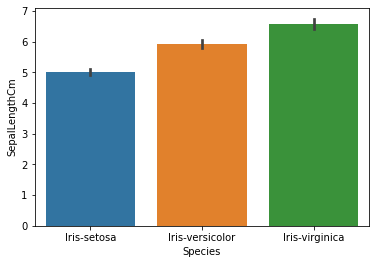

In [ ]:
X = data
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(X.Species, X.SepalLengthCm)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


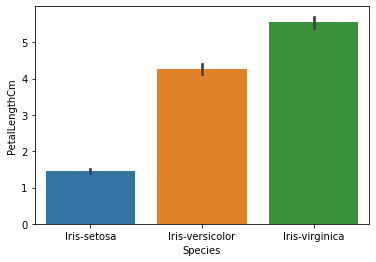

In [ ]:
sns.barplot(X.Species, X.PetalLengthCm)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


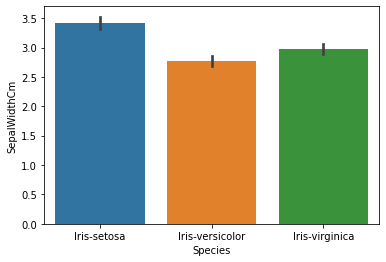

In [ ]:
sns.barplot(X.Species, X.SepalWidthCm)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


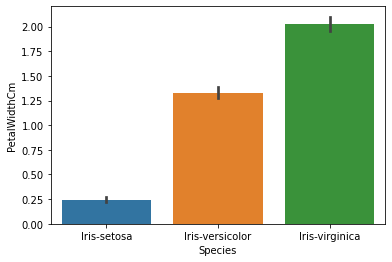

In [ ]:
sns.barplot(X.Species, X.PetalWidthCm)

Task 1.1: Implement two perceptron model to perform classification on iris database from scratch. You should not be using any inbuilt function for this implementation (except reading the data).

Solution Process: Treat 3 class classification problem as two 2 class problems. Need 2 perceptrons. Numpy should not be used. Lets split the data into 2 parts. In which first problem will have Y[0] (Iris-setosa), Y[1] (Iris-versicolor) and other problem will have Y[1] (Iris-versicolor) and Y[2] (Iris-virginica). In this case we will create 2 networks. First network will solve Y[0], Y[1] and other network will solve Y[1] and Y[2].

We will also perform perceptron learning on complete dataset as whole. Where the data will not be splitted into 2 parts with 2 classes per smaller dataset.

In [ ]:
count = 0
for i in range (150):
  if (data.Species[i] == 'Iris-setosa'):
    count += 1

print(count)

50


In [ ]:
count = 0
for i in range (150):
  if (data.Species[i] == 'Iris-versicolor'):
    count += 1

print(count)

50


In [ ]:
count = 0
for i in range (150):
  if (data.Species[i] == 'Iris-virginica'):
    count += 1

print(count)

50


In [ ]:
# data1 = X[0:75]
# data2 = X[75:150]
# print(data1)
# print(data2)

In [ ]:
# # Network 1 (with data1)
# train_data1 = data1[0:60] 
# test_data1 = data1[60:75]

# # Network 2 (with data2)
# train_data2 = data2[0:60] 
# test_data2 = data2[60:75]

In [ ]:
# Iris-setosa = ISA
# Iris-versicolor = IVR
# Iris-virginica = IVA

In [ ]:
ISA = X[0:50] # All Iris-setosa
IVR = X[50:100] # All Iris-versicolor
IVA = X[100:150] # All Iris-virginica
# print (ISA)
# print (IVR)
# print (IVA)


In [ ]:
import pandas as pd
ISA_IVR = pd.concat([ISA, IVR]) # Dataset only with 2 classes of ISA and IVR 100 values
IVR_IVA = pd.concat([IVR, IVA]) # Dataset only with 2 classes of IVR and IVA 100 values

In [ ]:
# Activation
def sigmoid(x):
  return 1 / (1 + 2.718**(-x))
# sigmoid(5.24)

def sigmoid_diff(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
# ISA_IVR.to_numpy()
# ISA_IVR.values.tolist()

In [ ]:
ISA_IVR=ISA_IVR.replace('Iris-setosa', 0)
ISA_IVR=ISA_IVR.replace('Iris-versicolor', 1)
# ISA_IVR
ISA_IVR = ISA_IVR[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
final_data = ISA_IVR.values.tolist() # Data for training
data = final_data


In [ ]:
# data

# Task 1.a

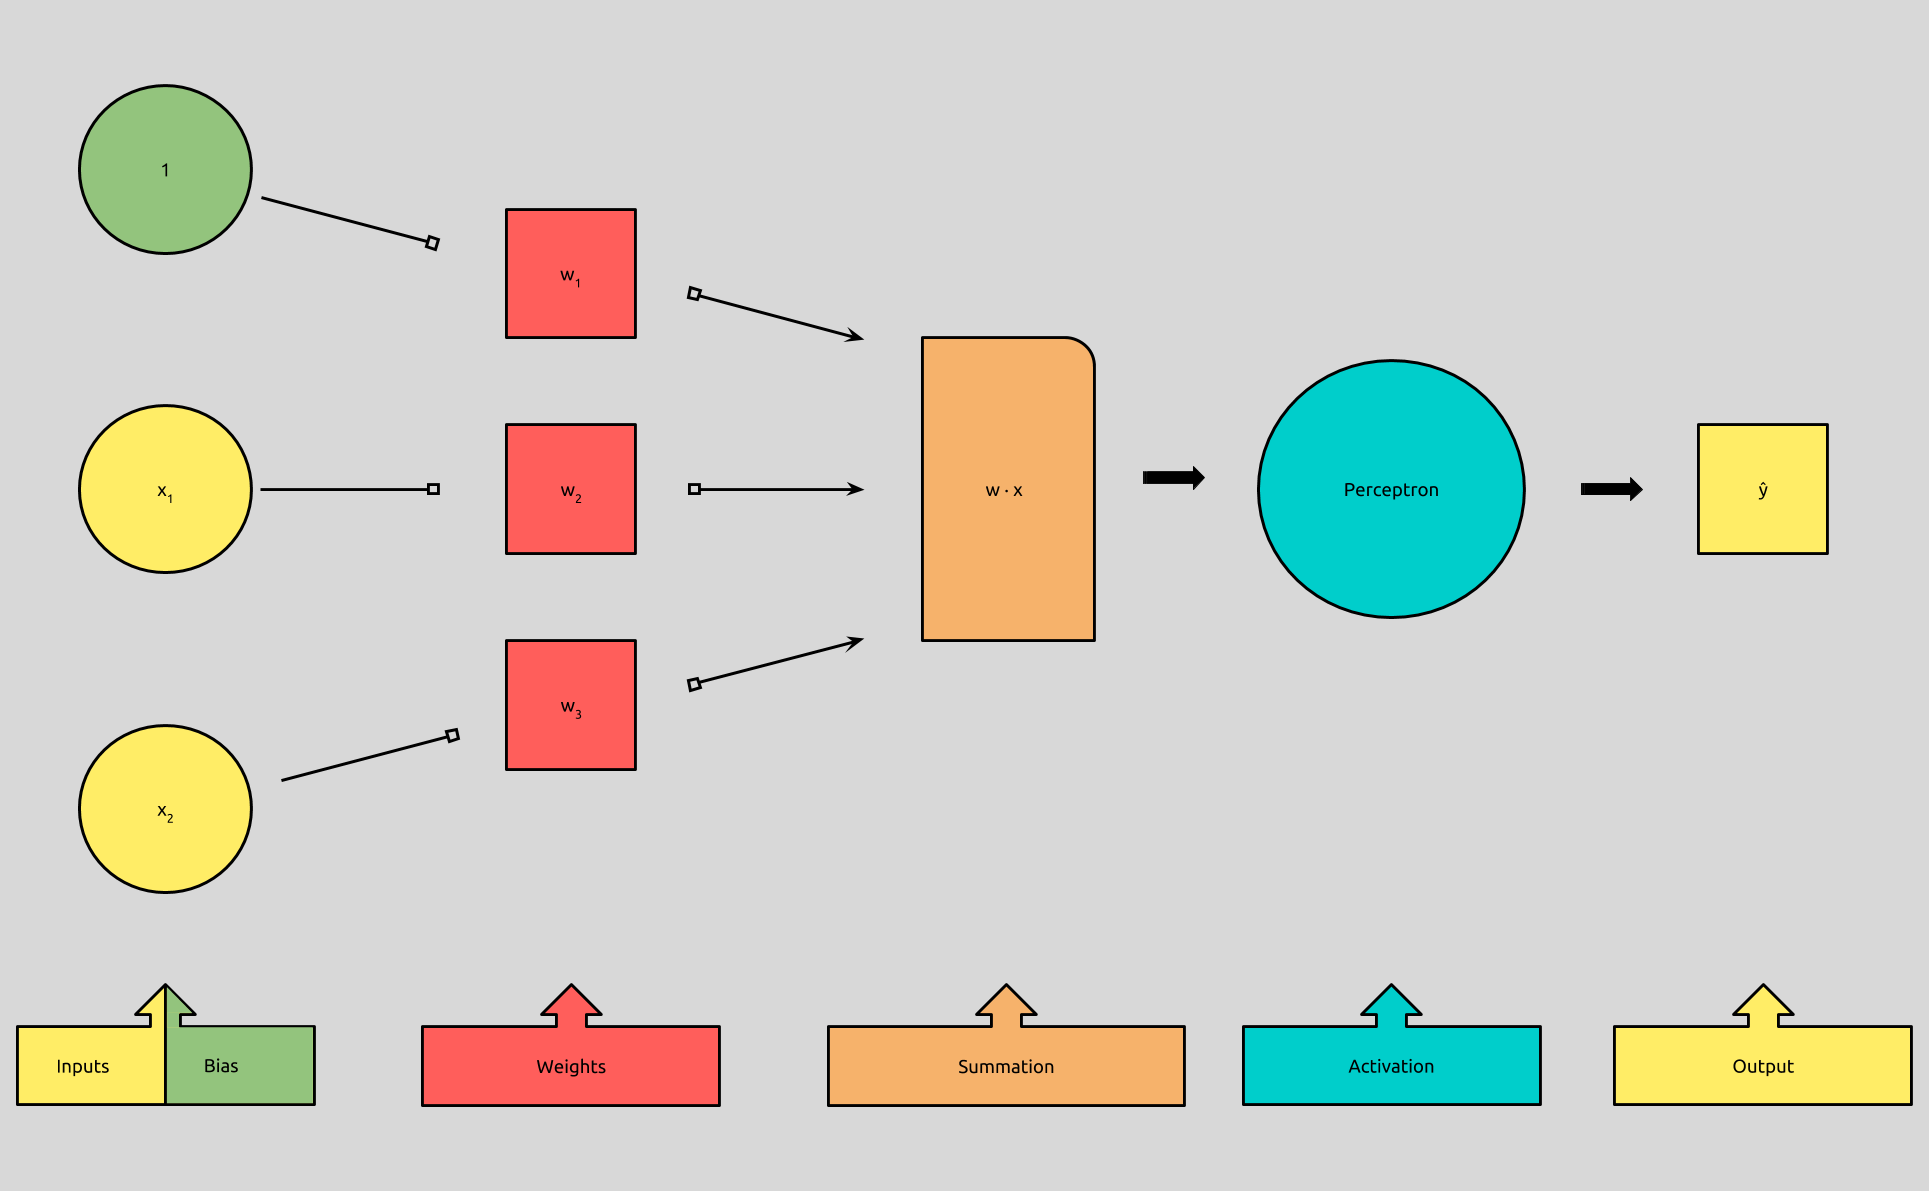

we are not using bias here. Image source : https://miro.medium.com/max/3858/1*UNgKcWm1alF5Et9qbnnAVw.png

In [ ]:
new_array_data = []
new_array_label = []
for eachitem in data[0:100]:
  # print(eachitem[0:4])
  new_array_data.append(eachitem[0:4])

for eachitem in data[0:100]:
  # print(eachitem[4])
  new_array_label.append(eachitem[4])
print (new_array_label)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [ ]:
only_data = new_array_data
only_label = new_array_label

(a) vary the learning rate and show the best learning rate value when your run it for 50 epochs.

# lr = 0.01

In [ ]:
# x0 to x3 we have inputs and x4 is the ground truth or label which will be used for calculating loss.
lr = 0.01 # Learning Rate aka ETA

def sigmoid(value):
  return 1 / (1 + 2.718**(-value))


import random
import numpy as np
w0=[random.randrange(0, 4, 1) for i in range(1)][0]
w1=[random.randrange(0, 4, 1) for i in range(1)][0]
w2=[random.randrange(0, 4, 1) for i in range(1)][0]
w3=[random.randrange(0, 4, 1) for i in range(1)][0]
weights = [w0,w1,w2,w3]

def predict(value):
  # z = (sum((np.array(value)) * (weights)))
  z = sigmoid(sum((np.array(value)) * (weights)))
  # return z
  if (z>0):
    return 1
  else:
    return 0

EPOCHS = 50
for i in range(EPOCHS):
  for input,label in zip(only_data, only_label):
    changeDelta = lr * (label-predict(input)) * np.array(input)
    weights = weights + changeDelta




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


In [ ]:
print(data[67])

[5.8, 2.7, 4.1, 1.0, 1.0]


In [ ]:
predict(data[67][0:4]) 

1

In [ ]:
# Calculating errors
correct=0
error=0
for i in range(100):
  if(predict(only_data[i])==data[i][4]):
    correct += 1
  else:
    error += 1

print("correct: "+str(correct))
print("incorrect: "+ str(error))

correct: 34
incorrect: 66


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


In [ ]:
print(data[32])
predict(data[32][0:4]) 

[5.2, 4.1, 1.5, 0.1, 0.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


0

# lr = 0.1

In [ ]:
# x0 to x3 we have inputs and x4 is the ground truth or label which will be used for calculating loss.
lr = 0.1 # Learning Rate aka ETA

def sigmoid(value):
  return 1 / (1 + 2.718**(-value))


import random
import numpy as np
w0=[random.randrange(0, 4, 1) for i in range(1)][0]
w1=[random.randrange(0, 4, 1) for i in range(1)][0]
w2=[random.randrange(0, 4, 1) for i in range(1)][0]
w3=[random.randrange(0, 4, 1) for i in range(1)][0]
weights = [w0,w1,w2,w3]

def predict(value):
  # z = (sum((np.array(value)) * (weights)))
  z = sigmoid(sum((np.array(value)) * (weights)))
  # return z
  if (z>0):
    return 1
  else:
    return 0

EPOCHS = 50
for i in range(EPOCHS):
  for input,label in zip(only_data, only_label):
    changeDelta = lr * (label-predict(input)) * np.array(input)
    weights = weights + changeDelta


# Calculating errors
correct=0
error=0
for i in range(100):
  if(predict(only_data[i])==data[i][4]):
    correct += 1
  else:
    error += 1

print("correct: "+str(correct))
print("incorrect: "+ str(error))
print(data[32])
predict(data[32][0:4]) 

correct: 95
incorrect: 5
[5.2, 4.1, 1.5, 0.1, 0.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


0

# Task 1.b

(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a))

In [ ]:
# x0 to x3 we have inputs and x4 is the ground truth or label which will be used for calculating loss.
lr = 0.1 # Learning Rate aka ETA
import matplotlib.pyplot as plt

def sigmoid(value):
  return 1 / (1 + 2.718**(-value))


import random
import numpy as np
w0=[random.randrange(0, 4, 1) for i in range(1)][0]
w1=[random.randrange(0, 4, 1) for i in range(1)][0]
w2=[random.randrange(0, 4, 1) for i in range(1)][0]
w3=[random.randrange(0, 4, 1) for i in range(1)][0]
weights = [w0,w1,w2,w3]

def predict(value):
  # z = (sum((np.array(value)) * (weights)))
  z = sigmoid(sum((np.array(value)) * (weights)))
  # return z
  if (z>0):
    return 1
  else:
    return 0
ar10 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
correct_array = []
incorrect_array = []
for EPOCH_NO in ar10:
  EPOCHS = EPOCH_NO
  print("EPOCH NUMBER: "+ str(EPOCHS))
  for i in range(EPOCHS):
    for input,label in zip(only_data, only_label):
      changeDelta = lr * (label-predict(input)) * np.array(input)
      weights = weights + changeDelta


  # Calculating errors
  correct=0
  error=0
  for i in range(100):
    if(predict(only_data[i])==data[i][4]):
      correct += 1
    else:
      error += 1

  print("correct: "+str(correct))
  correct_array.append(correct)
  print("incorrect: "+ str(error))
  incorrect_array.append(error)
  print(data[32])
  predict(data[32][0:4]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  


EPOCH NUMBER: 10
correct: 52
incorrect: 48
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 20
correct: 90
incorrect: 10
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 30
correct: 97
incorrect: 3
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 40
correct: 98
incorrect: 2
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 50
correct: 99
incorrect: 1
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 60
correct: 99
incorrect: 1
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 70
correct: 99
incorrect: 1
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 80
correct: 100
incorrect: 0
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 90
correct: 100
incorrect: 0
[5.2, 4.1, 1.5, 0.1, 0.0]
EPOCH NUMBER: 100
correct: 100
incorrect: 0
[5.2, 4.1, 1.5, 0.1, 0.0]


In [ ]:
print("correct_array", correct_array)
print("incorrect_array", incorrect_array)

correct_array [52, 90, 97, 98, 99, 99, 99, 100, 100, 100]
incorrect_array [48, 10, 3, 2, 1, 1, 1, 0, 0, 0]


Text(0.5, 0, 'Correct')

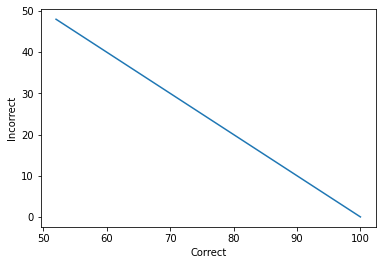

In [ ]:
plt.plot(correct_array, incorrect_array)
plt.ylabel("Incorrect")
plt.xlabel("Correct")

Text(0.5, 0, 'EPOCH')

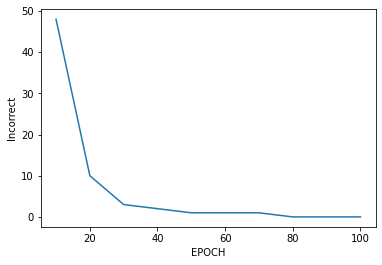

In [ ]:
plt.plot(ar10, incorrect_array)
plt.ylabel("Incorrect")
plt.xlabel("EPOCH")

In [ ]:
# Predicting an unknown flower
example = [2.2, 1.1, 3.5, 2.1]
predict(example)

1

In [ ]:
# Second Perceptron
IVR_IVA

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import random
IVR_IVA=IVR_IVA.replace('Iris-versicolor', 0)
IVR_IVA=IVR_IVA.replace('Iris-virginica', 1)
# IVR_IVA
IVR_IVA = IVR_IVA.sample(frac=1)
IVR_IVA_data = IVR_IVA[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
IVR_IVA_label = IVR_IVA[['Species']]
final_data = IVR_IVA_data.values.tolist() # Data for training
data = final_data
labels = IVR_IVA_label.values.tolist()


Now in this case we are doing same as earlier, now we are perorming the task on Iris-Virginica (IVA) and Iris-Vericular (IVR) only. Labelling 0 as IVR and 1 as IVA.

Also unlike before we will also divide the 100 data points into train and test to measure the curves and other parameters. So that our model does not overfit as earlier. Remember in previous code, we are judging our model on basis of training set itself. And it converged very easily. Now in this perceptron we will do two 2 class problem of solving IVA and IVR

In [ ]:
print(np.array(data).shape)
# 100 rows and 4 columns
print(np.array(labels).shape)
# 100 rows and 1 column

(100, 4)
(100, 1)


Below mentioned methodology will not work when you try to divide top 80 elemens as train and rest 20 as test because you will end up having huge blunder of having biasness in our Model. You dont want to make your model learning same class parameters all time. For example, here it will learn top 80 elements and the data is sorted already by the Species. Hence we have to pick random samples for train as well as test. Thus we perform random.shuffle ot the dataset.

In [ ]:

# print(np.array(data[0:80]).shape)
# print(np.array(data[80:100]).shape)
X_train = data[0:80]
Y_train = labels[0:80]
X_test = data[80:100]
Y_test = labels[80:100]
print("np.array(X_train).shape       np.array(Y_train).shape       np.array(X_test).shape       np.array(Y_test).shape")
print (np.array(X_train).shape,
       np.array(Y_train).shape,
       np.array(X_test).shape,
       np.array(Y_test).shape)

np.array(X_train).shape       np.array(Y_train).shape       np.array(X_test).shape       np.array(Y_test).shape
(80, 4) (80, 1) (20, 4) (20, 1)


In [ ]:
# x0 to x3 we have inputs and x4 is the ground truth or label which will be used for calculating loss.

lr = 0.1 # Learning Rate aka ETA
import matplotlib.pyplot as plt

def sigmoid(value):
  return 1 / (1 + 2.718**(-value))


import random
import numpy as np
w0=[random.randrange(0, 4, 1) for i in range(1)][0]
w1=[random.randrange(0, 4, 1) for i in range(1)][0]
w2=[random.randrange(0, 4, 1) for i in range(1)][0]
w3=[random.randrange(0, 4, 1) for i in range(1)][0]
weights = [w0,w1,w2,w3]

def predict(value):
  # z = (sum((np.array(value)) * (weights)))
  z = sigmoid(sum((np.array(value)) * (weights)))
  # return z
  if (z>0):
    return 1
  else:
    return 0
ar10 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
correct_array = []
incorrect_array = []
for EPOCH_NO in ar10:
  EPOCHS = EPOCH_NO
  print("EPOCH NUMBER: "+ str(EPOCHS))
  for i in range(EPOCHS):
    for input,label in zip(X_train, Y_train):
      changeDelta = lr * (np.array(label)-predict(np.array(input))) * np.array(input)
      # changeDelta = lr * (label[0]-predict((input))) * (input)
      weights = weights + changeDelta


  # Calculating errors
  correct=0
  error=0
  for i in range(0,20):
    # print("predict(X_test[i])",predict(X_test[i]))
    # print("Y_test[i]",Y_test[i])
    if(predict(X_test[i])==Y_test[i][0]):
      # print("predict(X_test[i])",predict(X_test[i]))
      correct += 1
    else:
      error += 1

  print("correct: "+str(correct))
  correct_array.append(correct)
  print("incorrect: "+ str(error))
  incorrect_array.append(error)
  

EPOCH NUMBER: 10
correct: 6
incorrect: 14
EPOCH NUMBER: 20
correct: 9
incorrect: 11
EPOCH NUMBER: 30
correct: 10
incorrect: 10
EPOCH NUMBER: 40


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in double_scalars
  import sys


correct: 12
incorrect: 8
EPOCH NUMBER: 50
correct: 12
incorrect: 8
EPOCH NUMBER: 60
correct: 12
incorrect: 8
EPOCH NUMBER: 70
correct: 12
incorrect: 8
EPOCH NUMBER: 80
correct: 13
incorrect: 7
EPOCH NUMBER: 90
correct: 13
incorrect: 7
EPOCH NUMBER: 100
correct: 14
incorrect: 6


In [ ]:
print("correct_array", correct_array)
print("incorrect_array", incorrect_array)

correct_array [6, 9, 10, 12, 12, 12, 12, 13, 13, 14]
incorrect_array [14, 11, 10, 8, 8, 8, 8, 7, 7, 6]


Text(0.5, 0, 'Correct')

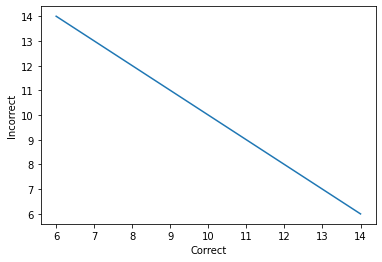

In [ ]:
plt.plot(correct_array, incorrect_array)
plt.ylabel("Incorrect")
plt.xlabel("Correct")

Text(0.5, 0, 'EPOCH')

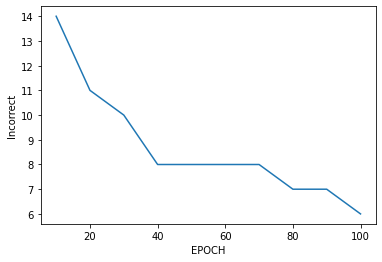

In [ ]:
plt.plot(ar10, incorrect_array)
plt.ylabel("Incorrect")
plt.xlabel("EPOCH")

Q2. Implement a 3-class backpropagation NNet on your own to classify iris data, i.e. from scratch. You should not be using any inbuilt function for this implementation (except reading the data). (a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. (b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a)) (c) add L2 regularization - show the comparisons with and without this regularization and analyze your results.

# Task 2.a
Implement a 3-class backpropagation NNet on your own to classify iris data, i.e. from scratch. You should not be using any inbuilt function for this implementation (except reading the data). (a) vary the learning rate and show the best learning rate value when your run it for 50 epochs. 

In [ ]:
# Date: 16th December 2020
# importing pandas and reading dataset from github
import pandas as pd 
import matplotlib.pyplot as plt
import random
iris = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')

iris = iris.sample(frac=1)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,28,5.2,3.5,1.5,0.2,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
104,105,6.5,3.0,5.8,2.2,Iris-virginica
139,140,6.9,3.1,5.4,2.1,Iris-virginica


In [ ]:
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 2, 1], inplace=True)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
27,28,5.2,3.5,1.5,0.2,0
74,75,6.4,2.9,4.3,1.3,1
51,52,6.4,3.2,4.5,1.5,1
104,105,6.5,3.0,5.8,2.2,2
139,140,6.9,3.1,5.4,2.1,2


In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
27,5.2,3.5,1.5,0.2
74,6.4,2.9,4.3,1.3
51,6.4,3.2,4.5,1.5
104,6.5,3.0,5.8,2.2
139,6.9,3.1,5.4,2.1
...,...,...,...,...
115,6.4,3.2,5.3,2.3
85,6.0,3.4,4.5,1.6
9,4.9,3.1,1.5,0.1
36,5.5,3.5,1.3,0.2


In [ ]:
y = iris[['Species']]
y

,Species
27,0
74,1
51,1
104,2
139,2
...,...
115,2
85,1
9,0
36,0


In [ ]:
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [ ]:
# y = y.values.tolist()

In [ ]:
import numpy as np
# we have 3 classes so 3 columns will be there for each class' one hot vector.
# initialize empty array
rows, cols = (150, 3) 
one_hots = [[0]*cols]*rows
np.array(one_hots).shape
one_hots = np.array(one_hots)

In [ ]:
def OneHotConversion(y):
  for i in range(150):
    one_hots[i, y[i]] = 1
  return one_hots

In [ ]:
# OneHotConversion(np.array(y))

In [ ]:
one_hot_vectors = OneHotConversion(np.array(y))

In [ ]:
X = np.array(X)
y = one_hot_vectors

In [ ]:
X[0]

array([5.2, 3.5, 1.5, 0.2])

In [ ]:
y[0]

array([1, 0, 0])

In [ ]:
X_train = X[0:120]
Y_train = y[0:120]
X_test = X[120:150]
Y_test = y[120:150]

In [ ]:
array = [] 
  
for i in range(4): 
    array.append([]) 
      
    for j in range(5): 
        array[i].append(random.random()) 

array1 = np.array(array)          
print(array1) 

[[0.92411408 0.8201629  0.3342386  0.94348969 0.37082598]
 [0.3795587  0.75196011 0.88766688 0.72492722 0.47825099]
 [0.79615116 0.43569327 0.56132322 0.30917945 0.35519716]
 [0.74515804 0.85578562 0.8413806  0.04506766 0.85259728]]


In [ ]:
array = [] 
  
for i in range(5): 
    array.append([]) 
      
    for j in range(3): 
        array[i].append(random.random()) 

array2 = np.array(array)          
print(array2) 

[[0.19982126 0.81704907 0.42675977]
 [0.01486799 0.18874855 0.25217448]
 [0.98844118 0.20617578 0.65864389]
 [0.21150572 0.96051843 0.92537744]
 [0.99343214 0.94834938 0.69007846]]


In [ ]:
array1

array([[0.92411408, 0.8201629 , 0.3342386 , 0.94348969, 0.37082598],
       [0.3795587 , 0.75196011, 0.88766688, 0.72492722, 0.47825099],
       [0.79615116, 0.43569327, 0.56132322, 0.30917945, 0.35519716],
       [0.74515804, 0.85578562, 0.8413806 , 0.04506766, 0.85259728]])

In [ ]:
array2

array([[0.19982126, 0.81704907, 0.42675977],
       [0.01486799, 0.18874855, 0.25217448],
       [0.98844118, 0.20617578, 0.65864389],
       [0.21150572, 0.96051843, 0.92537744],
       [0.99343214, 0.94834938, 0.69007846]])

In [ ]:
weights_input_to_hidden = array1 # wh
weights_hidden_to_output = array2 # wo
wh = weights_input_to_hidden
wo = weights_hidden_to_output

# Neural Network with ETA = 0.1 EPOCHS = 1000

In [ ]:
eta = 0.1 # learning rate
EPOCHS = 1000

In [ ]:
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
errors =[]
for i in range(EPOCHS):

    # forward pass
    input_layer = X_train # input layer
    hidden_layer = sigmoid(np.dot(input_layer, wh)) # multiplication of inputs and weights
    output_layer = sigmoid(np.dot(hidden_layer, wo)) # multiplication of inputs and weights

    # Backward pass
    output_layer_error = Y_train - output_layer # ground truth - predicted output
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer) # D1*Z1 Delta * activation(sum weighted output)
    
    hidden_layer_error = output_layer_delta.dot(wo.T) # Backpropogating Gradients
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)  # Backpropogating Gradients
    
    wo += hidden_layer.T.dot(output_layer_delta) * eta
    wh += input_layer.T.dot(hidden_layer_delta) * eta
    
    error = np.mean(np.abs(output_layer_error))
    errors.append(error)
    accuracy = (1 - error) * 100 
    print("EPOCH",i)
    print("error",error)
    print("accuracy",accuracy)
    print("\n")

plt.plot(errors)
plt.xlabel('EPOCH')
plt.ylabel('Error')
plt.show()
        
print("Overall Accuracy" + str(accuracy))

# Task 2.a 

EPOCHS = 50

ETA = 0.01 (fixed when giving best accuracy)

Calculated accuracy : 97.32268998830814

EPOCH 0
error 0.026865941478511558
accuracy 97.31340585214885


EPOCH 1
error 0.026863980802571907
accuracy 97.31360191974281


EPOCH 2
error 0.026862021492989087
accuracy 97.31379785070109


EPOCH 3
error 0.02686006389718815
accuracy 97.31399361028117


EPOCH 4
error 0.02685810829758483
accuracy 97.31418917024152


EPOCH 5
error 0.0268561549230696
accuracy 97.31438450769303


EPOCH 6
error 0.026854203958500574
accuracy 97.31457960414994


EPOCH 7
error 0.02685225555254715
accuracy 97.31477444474528


EPOCH 8
error 0.02685030982416883
accuracy 97.31496901758312


EPOCH 9
error 0.02684836686796435
accuracy 97.31516331320357


EPOCH 10
error 0.026846426758585295
accuracy 97.31535732414147


EPOCH 11
error 0.026844489554376565
accuracy 97.31555104456234


EPOCH 12
error 0.02684255530037671
accuracy 97.31574446996233


EPOCH 13
error 0.02684062403078964
accuracy 97.31593759692103


EPOCH 14
error 0.02683869577101855
accuracy 97.31613042289815


EPOCH 15
error 0.02683677053933858
accuracy 9

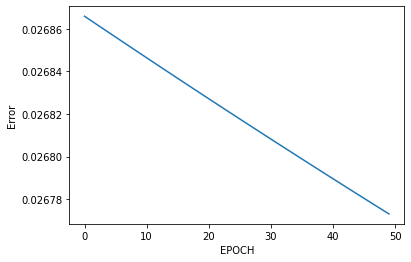

Overall Accuracy97.32268998830814


In [ ]:
eta = 0.01 # learning rate
EPOCHS = 50
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
errors =[]
for i in range(EPOCHS):

    # forward pass
    input_layer = X_train # input layer
    hidden_layer = sigmoid(np.dot(input_layer, wh)) # multiplication of inputs and weights
    output_layer = sigmoid(np.dot(hidden_layer, wo)) # multiplication of inputs and weights

    # Backward pass
    output_layer_error = Y_train - output_layer # ground truth - predicted output
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer) # D1*Z1 Delta * activation(sum weighted output)
    
    hidden_layer_error = output_layer_delta.dot(wo.T) # Backpropogating Gradients
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)  # Backpropogating Gradients
    
    wo += hidden_layer.T.dot(output_layer_delta) * eta
    wh += input_layer.T.dot(hidden_layer_delta) * eta
    
    error = np.mean(np.abs(output_layer_error))
    errors.append(error)
    accuracy = (1 - error) * 100 
    print("EPOCH",i)
    print("error",error)
    print("accuracy",accuracy)
    print("\n")

plt.plot(errors)
plt.xlabel('EPOCH')
plt.ylabel('Error')
plt.show()
        
print("Overall Accuracy" + str(accuracy))

# Task 2.a 

EPOCHS = 50

ETA = 0.001 (fixed when giving best accuracy)

calculated accuracy = 97.32376017678327

EPOCH 0
error 0.02677127871198474
accuracy 97.32287212880154


EPOCH 1
error 0.026771096822736786
accuracy 97.32289031772632


EPOCH 2
error 0.02677091496038094
accuracy 97.3229085039619


EPOCH 3
error 0.02677073312494937
accuracy 97.32292668750506


EPOCH 4
error 0.02677055131647345
accuracy 97.32294486835265


EPOCH 5
error 0.02677036953498414
accuracy 97.32296304650158


EPOCH 6
error 0.02677018778051145
accuracy 97.32298122194885


EPOCH 7
error 0.026770006053084928
accuracy 97.32299939469151


EPOCH 8
error 0.02676982435273345
accuracy 97.32301756472665


EPOCH 9
error 0.026769642679485253
accuracy 97.32303573205148


EPOCH 10
error 0.026769461033367914
accuracy 97.3230538966632


EPOCH 11
error 0.026769279414408497
accuracy 97.32307205855915


EPOCH 12
error 0.0267690978226334
accuracy 97.32309021773666


EPOCH 13
error 0.026768916258068452
accuracy 97.32310837419315


EPOCH 14
error 0.026768734720738933
accuracy 97.3231265279261


EPOCH 15
error 0.026768553210669562
accuracy 97

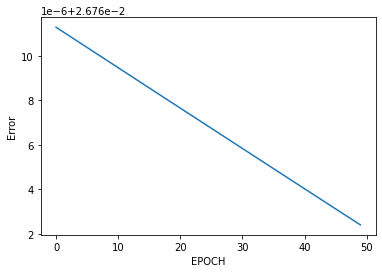

Overall Accuracy97.32376017678327


In [ ]:
eta = 0.001 # learning rate
EPOCHS = 50
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
errors =[]
for i in range(EPOCHS):

    # forward pass
    input_layer = X_train # input layer
    hidden_layer = sigmoid(np.dot(input_layer, wh)) # multiplication of inputs and weights
    output_layer = sigmoid(np.dot(hidden_layer, wo)) # multiplication of inputs and weights

    # Backward pass
    output_layer_error = Y_train - output_layer # ground truth - predicted output
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer) # D1*Z1 Delta * activation(sum weighted output)
    
    hidden_layer_error = output_layer_delta.dot(wo.T) # Backpropogating Gradients
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)  # Backpropogating Gradients
    
    wo += hidden_layer.T.dot(output_layer_delta) * eta
    wh += input_layer.T.dot(hidden_layer_delta) * eta
    
    error = np.mean(np.abs(output_layer_error))
    errors.append(error)
    accuracy = (1 - error) * 100 
    print("EPOCH",i)
    print("error",error)
    print("accuracy",accuracy)
    print("\n")

plt.plot(errors)
plt.xlabel('EPOCH')
plt.ylabel('Error')
plt.show()
        
print("Overall Accuracy" + str(accuracy))

# Task 2.b Lets fix this eta = 0.001 and change EPOCHS from 10, 20 and so on to 100
(b) vary the number of epochs from 10 to 100 in a step of 10 and show the loss value curve (using the best learning rate obtained from (a)) 
new_ar10 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



epoch_number 10
EPOCH 0
error 0.6339610205899439
accuracy 36.60389794100561


EPOCH 1
error 0.6317954788236654
accuracy 36.820452117633465


EPOCH 2
error 0.6295188079088796
accuracy 37.04811920911204


EPOCH 3
error 0.6271295029273628
accuracy 37.28704970726372


EPOCH 4
error 0.6246267083725938
accuracy 37.53732916274062


EPOCH 5
error 0.6220103303918344
accuracy 37.79896696081656


EPOCH 6
error 0.6192811500936102
accuracy 38.071884990638985


EPOCH 7
error 0.6164409320044958
accuracy 38.35590679955042


EPOCH 8
error 0.613492520606891
accuracy 38.650747939310904


EPOCH 9
error 0.6104399172211419
accuracy 38.956008277885815




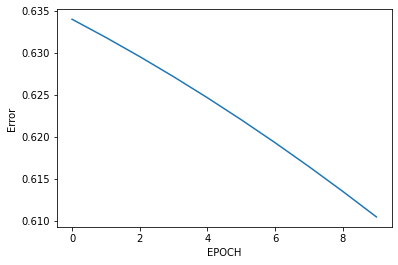

Overall Accuracy38.956008277885815


epoch_number 20
EPOCH 0
error 0.607288329509578
accuracy 39.2711670490422


EPOCH 1
error 0.6040441867042945
accuracy 39.59558132957055


EPOCH 2
error 0.6007151153131806
accuracy 39.92848846868194


EPOCH 3
error 0.5973098724299365
accuracy 40.26901275700635


EPOCH 4
error 0.5938382366331288
accuracy 40.61617633668712


EPOCH 5
error 0.5903108594899804
accuracy 40.96891405100196


EPOCH 6
error 0.5867390835334512
accuracy 41.32609164665488


EPOCH 7
error 0.5831347349344167
accuracy 41.68652650655833


EPOCH 8
error 0.5795099007010249
accuracy 42.04900992989751


EPOCH 9
error 0.5758767009716879
accuracy 42.41232990283122


EPOCH 10
error 0.5722470668124657
accuracy 42.77529331875343


EPOCH 11
error 0.5686325329756989
accuracy 43.13674670243011


EPOCH 12
error 0.5650440534950987
accuracy 43.49559465049013


EPOCH 13
error 0.561491845998386
accuracy 43.8508154001614


EPOCH 14
error 0.5579852684386305
accuracy 44.20147315613695


EPOCH 15
error 0

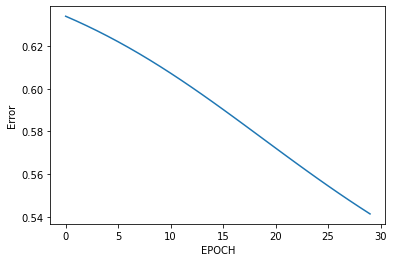

Overall Accuracy45.86043377627047


epoch_number 30
EPOCH 0
error 0.5383040014950541
accuracy 46.16959985049459


EPOCH 1
error 0.5352957835520252
accuracy 46.470421644797476


EPOCH 2
error 0.5323727115278053
accuracy 46.76272884721947


EPOCH 3
error 0.5295357540757575
accuracy 47.04642459242425


EPOCH 4
error 0.5267852277392333
accuracy 47.32147722607667


EPOCH 5
error 0.5241208793243891
accuracy 47.58791206756109


EPOCH 6
error 0.5215419659765713
accuracy 47.84580340234287


EPOCH 7
error 0.5190473312214242
accuracy 48.095266877857576


EPOCH 8
error 0.5166354757508342
accuracy 48.33645242491657


EPOCH 9
error 0.5143046221824392
accuracy 48.569537781756075


EPOCH 10
error 0.512052773393768
accuracy 48.7947226606232


EPOCH 11
error 0.5098777643289435
accuracy 49.01222356710565


EPOCH 12
error 0.5077773074026339
accuracy 49.222269259736606


EPOCH 13
error 0.5057490317906539
accuracy 49.42509682093461


EPOCH 14
error 0.5037905170085938
accuracy 49.62094829914062


EPOCH 15
er

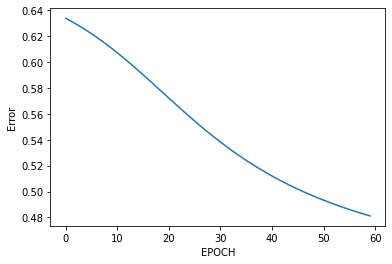

Overall Accuracy51.878865588825974


epoch_number 40
EPOCH 0
error 0.48006676119772024
accuracy 51.99332388022797


EPOCH 1
error 0.47895756332245126
accuracy 52.10424366775488


EPOCH 2
error 0.47788236393716965
accuracy 52.211763606283036


EPOCH 3
error 0.4768398410964761
accuracy 52.316015890352396


EPOCH 4
error 0.47582873471853093
accuracy 52.41712652814691


EPOCH 5
error 0.474847843827966
accuracy 52.5152156172034


EPOCH 6
error 0.4738960238145066
accuracy 52.61039761854934


EPOCH 7
error 0.47297218373314953
accuracy 52.702781626685045


EPOCH 8
error 0.4720752836657857
accuracy 52.79247163342142


EPOCH 9
error 0.4712043321592152
accuracy 52.87956678407848


EPOCH 10
error 0.4703583837504373
accuracy 52.964161624956276


EPOCH 11
error 0.4695365365867638
accuracy 53.04634634132361


EPOCH 12
error 0.46873793014560444
accuracy 53.12620698543955


EPOCH 13
error 0.4679617430565867
accuracy 53.20382569434132


EPOCH 14
error 0.4672071910269349
accuracy 53.27928089730651


EPOC

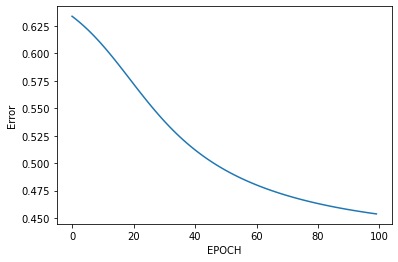

Overall Accuracy54.63512274668732


epoch_number 50
EPOCH 0
error 0.4532665322446405
accuracy 54.67334677553595


EPOCH 1
error 0.4528935663224628
accuracy 54.71064336775372


EPOCH 2
error 0.45252961713428197
accuracy 54.7470382865718


EPOCH 3
error 0.4521744356364781
accuracy 54.782556436352195


EPOCH 4
error 0.4518277810111171
accuracy 54.81722189888829


EPOCH 5
error 0.45148942032225237
accuracy 54.851057967774764


EPOCH 6
error 0.45115912819033416
accuracy 54.88408718096658


EPOCH 7
error 0.4508366864835993
accuracy 54.91633135164007


EPOCH 8
error 0.45052188402539495
accuracy 54.94781159746051


EPOCH 9
error 0.45021451631645876
accuracy 54.97854836835412


EPOCH 10
error 0.44991438527124217
accuracy 55.00856147287578


EPOCH 11
error 0.4496212989674264
accuracy 55.03787010325736


EPOCH 12
error 0.4493350714078359
accuracy 55.06649285921641


EPOCH 13
error 0.4490555222940088
accuracy 55.09444777059912


EPOCH 14
error 0.44878247681073336
accuracy 55.12175231892667


EPOCH

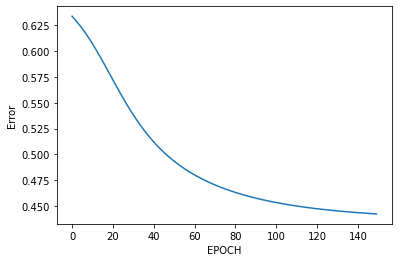

Overall Accuracy55.7723636783644


epoch_number 60
EPOCH 0
error 0.442154605262724
accuracy 55.7845394737276


EPOCH 1
error 0.4420354278791362
accuracy 55.79645721208638


EPOCH 2
error 0.4419187701705768
accuracy 55.80812298294232


EPOCH 3
error 0.44180457278116214
accuracy 55.819542721883785


EPOCH 4
error 0.44169277785070743
accuracy 55.83072221492926


EPOCH 5
error 0.44158332897269464
accuracy 55.84166710273053


EPOCH 6
error 0.441476171153587
accuracy 55.852382884641294


EPOCH 7
error 0.44137125077343503
accuracy 55.86287492265649


EPOCH 8
error 0.4412685155477259
accuracy 55.873148445227415


EPOCH 9
error 0.4411679144904282
accuracy 55.883208550957185


EPOCH 10
error 0.4410693978781856
accuracy 55.89306021218143


EPOCH 11
error 0.4409729172156168
accuracy 55.90270827843832


EPOCH 12
error 0.4408784252016805
accuracy 55.91215747983195


EPOCH 13
error 0.44078587569706457
accuracy 55.921412430293536


EPOCH 14
error 0.4406952236925635
accuracy 55.93047763074366


EPOCH 1

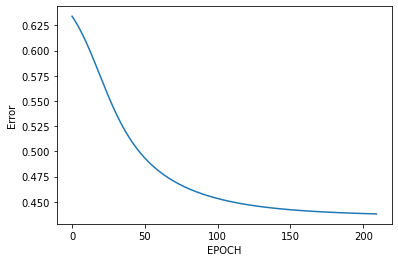

Overall Accuracy56.19781157146795


epoch_number 70
EPOCH 0
error 0.4379842927532421
accuracy 56.2015707246758


EPOCH 1
error 0.43794733933841534
accuracy 56.205266066158465


EPOCH 2
error 0.437911009065634
accuracy 56.20889909343661


EPOCH 3
error 0.43787528726118774
accuracy 56.21247127388123


EPOCH 4
error 0.4378401595444654
accuracy 56.215984045553455


EPOCH 5
error 0.43780561181974453
accuracy 56.219438818025544


EPOCH 6
error 0.4377716302681612
accuracy 56.22283697318389


EPOCH 7
error 0.43773820133985397
accuracy 56.226179866014604


EPOCH 8
error 0.43770531174627847
accuracy 56.22946882537215


EPOCH 9
error 0.43767294845268395
accuracy 56.2327051547316


EPOCH 10
error 0.4376410986707509
accuracy 56.235890132924915


EPOCH 11
error 0.437609749851381
accuracy 56.2390250148619


EPOCH 12
error 0.437578889677637
accuracy 56.24211103223631


EPOCH 13
error 0.4375485060578271
accuracy 56.2451493942173


EPOCH 14
error 0.4375185871187283
accuracy 56.248141288127165


EPOCH 15

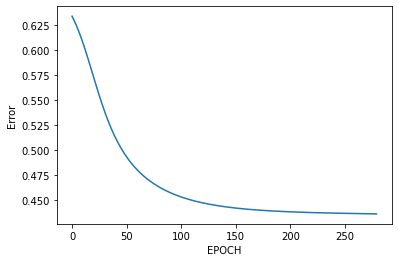

Overall Accuracy56.369467047439414


epoch_number 80
EPOCH 0
error 0.43628669464309255
accuracy 56.371330535690745


EPOCH 1
error 0.4362680349186127
accuracy 56.373196508138726


EPOCH 2
error 0.4362493425035433
accuracy 56.37506574964567


EPOCH 3
error 0.4362306094956691
accuracy 56.37693905043308


EPOCH 4
error 0.43621182793524504
accuracy 56.378817206475496


EPOCH 5
error 0.43619298980104454
accuracy 56.38070101989554


EPOCH 6
error 0.4361740870063959
accuracy 56.382591299360406


EPOCH 7
error 0.4361551113952027
accuracy 56.384488860479735


EPOCH 8
error 0.4361360547379516
accuracy 56.38639452620484


EPOCH 9
error 0.4361169087277022
accuracy 56.38830912722979


EPOCH 10
error 0.4360976649760635
accuracy 56.39023350239365


EPOCH 11
error 0.43607831500915195
accuracy 56.392168499084804


EPOCH 12
error 0.43605885026353425
accuracy 56.394114973646566


EPOCH 13
error 0.43603926208215277
accuracy 56.39607379178473


EPOCH 14
error 0.43601954171023527
accuracy 56.39804582897647


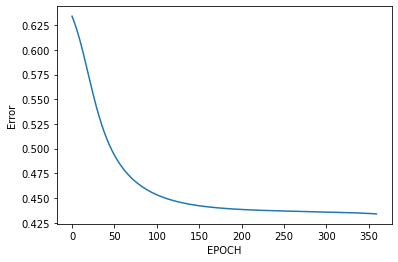

Overall Accuracy56.609013922077025


epoch_number 90
EPOCH 0
error 0.43385379723858586
accuracy 56.614620276141416


EPOCH 1
error 0.43379660598840675
accuracy 56.62033940115933


EPOCH 2
error 0.43373826544428784
accuracy 56.62617345557122


EPOCH 3
error 0.4336787539660574
accuracy 56.63212460339426


EPOCH 4
error 0.43361804987733704
accuracy 56.6381950122663


EPOCH 5
error 0.43355613148631206
accuracy 56.644386851368786


EPOCH 6
error 0.4334929771077359
accuracy 56.650702289226416


EPOCH 7
error 0.43342856508619015
accuracy 56.65714349138098


EPOCH 8
error 0.43336287382062216
accuracy 56.66371261793779


EPOCH 9
error 0.43329588179017436
accuracy 56.67041182098256


EPOCH 10
error 0.4332275675813169
accuracy 56.67724324186831


EPOCH 11
error 0.43315790991629466
accuracy 56.68420900837054


EPOCH 12
error 0.43308688768288967
accuracy 56.691311231711026


EPOCH 13
error 0.43301447996549974
accuracy 56.69855200345002


EPOCH 14
error 0.4329406660775257
accuracy 56.70593339224743


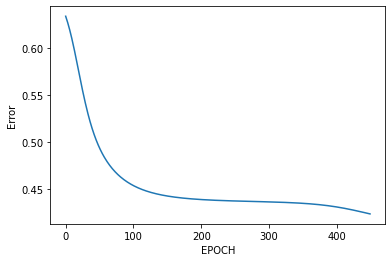

Overall Accuracy57.69299964246666


epoch_number 100
EPOCH 0
error 0.42289960602176435
accuracy 57.710039397823564


EPOCH 1
error 0.4227292670737501
accuracy 57.727073292624986


EPOCH 2
error 0.42255903948184526
accuracy 57.744096051815475


EPOCH 3
error 0.42238897560001254
accuracy 57.761102439998744


EPOCH 4
error 0.42221912732960143
accuracy 57.77808726703986


EPOCH 5
error 0.4220495460654672
accuracy 57.79504539345328


EPOCH 6
error 0.42188028264429417
accuracy 57.81197173557058


EPOCH 7
error 0.42171138729518226
accuracy 57.82886127048177


EPOCH 8
error 0.42154290959253443
accuracy 57.84570904074655


EPOCH 9
error 0.4213748984112761
accuracy 57.86251015887238


EPOCH 10
error 0.42120740188442324
accuracy 57.87925981155768


EPOCH 11
error 0.42104046736300793
accuracy 57.895953263699205


EPOCH 12
error 0.4208741413783531
accuracy 57.91258586216469


EPOCH 13
error 0.4207084696066872
accuracy 57.92915303933128


EPOCH 14
error 0.42054349683607295
accuracy 57.94565031639271

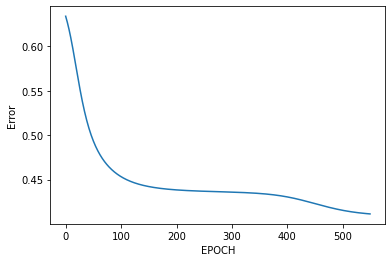

Overall Accuracy58.863831669270205


In [ ]:
new_ar10 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
eta = 0.001
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
errors =[]
accuracy_epoch_wise = []
for epoch_number in new_ar10:
  print("\n")
  print("epoch_number",epoch_number)
  for i in range(epoch_number):

      # forward pass
      input_layer = X_train # input layer
      hidden_layer = sigmoid(np.dot(input_layer, wh)) # multiplication of inputs and weights
      output_layer = sigmoid(np.dot(hidden_layer, wo)) # multiplication of inputs and weights

      # Backward pass
      output_layer_error = Y_train - output_layer # ground truth - predicted output
      output_layer_delta = output_layer_error * sigmoid_deriv(output_layer) # D1*Z1 Delta * activation(sum weighted output)
      
      hidden_layer_error = output_layer_delta.dot(wo.T) # Backpropogating Gradients
      hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)  # Backpropogating Gradients
      
      wo += hidden_layer.T.dot(output_layer_delta) * eta
      wh += input_layer.T.dot(hidden_layer_delta) * eta
      
      error = np.mean(np.abs(output_layer_error))
      errors.append(error)
      accuracy = (1 - error) * 100 
      print("EPOCH",i)
      print("error",error)
      print("accuracy",accuracy)
      print("\n")

  plt.plot(errors)
  plt.xlabel('EPOCH')
  plt.ylabel('Error')
  plt.show()
          
  print("Overall Accuracy" + str(accuracy))
  accuracy_epoch_wise.append(accuracy)



In [ ]:
accuracy_epoch_wise

[38.956008277885815,
 45.86043377627047,
 51.878865588825974,
 54.63512274668732,
 55.7723636783644,
 56.19781157146795,
 56.369467047439414,
 56.609013922077025,
 57.69299964246666,
 58.863831669270205]

The accuracy increased with increasing number of EPOCHS. from 38% in 10 EPOCH phase to 58% in 100 EPOCH phase.

In [ ]:
# Lets test on Test set

In [ ]:
input_layer = X_test
hidden_layer = sigmoid(np.dot(input_layer, wh))
output_layer = sigmoid(np.dot(hidden_layer, wo))

test_error = Y_test - output_layer
print("error in test phase", test_error)
test_accuracy = (1-test_error) * 100
print("accuracy in test phase", test_accuracy)


error in test phase [[-3.98704861e-04  8.75993777e-03 -7.30391494e-03]
 [-3.98705152e-04  8.75993057e-03 -7.30390887e-03]
 [-3.45024005e-07 -3.25527349e-02  3.26813809e-02]
 [-3.98705269e-04  8.75992788e-03 -7.30390662e-03]
 [-3.51163384e-07  9.66815291e-01 -9.66684450e-01]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [-4.04252074e-07  9.61328338e-01 -9.61178212e-01]
 [-3.45024004e-07 -3.25527348e-02  3.26813809e-02]
 [-3.45024004e-07 -3.25527348e-02  3.26813809e-02]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [-3.98705256e-04  8.75992801e-03 -7.30390673e-03]
 [-3.45024004e-07 -3.25527348e-02  3.26813809e-02]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [-3.45024004e-07 -3.25527348e-02  3.26813809e-02]
 [ 9.61685553e-04 -8.52984413e-04 -2.42971881e-04]
 [-3.98705266e-04  8.75992783e-03 -7.30390658e-03]
 [-3.98705264e-04  8.75992781e-03 -7.30390656e-03]
 [-3.986227

In [ ]:
input_layer = X_test
hidden_layer = sigmoid(np.dot(input_layer, wh))
output_layer = sigmoid(np.dot(hidden_layer, wo))

test_error = np.mean(Y_test - output_layer)
print("error in test phase", test_error)
test_accuracy = (1-test_error) * 100
print("accuracy in test phase", test_accuracy)


error in test phase 0.00013174521796667824
accuracy in test phase 99.98682547820333


# Task 2.c
add L2 regularization - show the comparisons with and without this regularization and analyze your results.

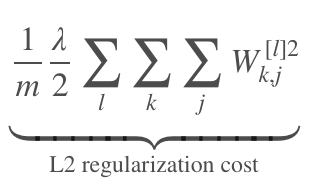

In [ ]:
# earlier what we have done is without regularization.
# Now lets introduce L2 regularization
# L1 Norm Error and L2 Regularization
# m Number of examples in train dataset
m = np.array(X_train).shape[0]
Lambda = 0.1 # regularization constant
l2_reg = (np.sum(np.array(wh*wh)) + np.sum(np.array(wo*wo))) * (0.5) * (1/m) * Lambda
l2_reg

1438.1986273055027

EPOCH 0
error 0.022222222222222143


EPOCH 1
error 0.016666666666666607


EPOCH 2
error 0.016666666666666607


EPOCH 3
error 0.016666666666666607


EPOCH 4
error 0.016666666666666607


EPOCH 5
error 0.016666666666666607


EPOCH 6
error 0.016666666666666607


EPOCH 7
error 0.016666666666666607


EPOCH 8
error 0.016666666666666607


EPOCH 9
error 0.016666666666666607


EPOCH 10
error 0.016666666666666607


EPOCH 11
error 0.016666666666666607


EPOCH 12
error 0.016666666666666607


EPOCH 13
error 0.016666666666666607


EPOCH 14
error 0.016666666666666607


EPOCH 15
error 0.016666666666666607


EPOCH 16
error 0.016666666666666607


EPOCH 17
error 0.016666666666666607


EPOCH 18
error 0.016666666666666607


EPOCH 19
error 0.016666666666666607


EPOCH 20
error 0.016666666666666607


EPOCH 21
error 0.016666666666666607


EPOCH 22
error 0.016666666666666607


EPOCH 23
error 0.016666666666666607


EPOCH 24
error 0.016666666666666607


EPOCH 25
error 0.016666666666666607


EPOCH 26
error 0.01112

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


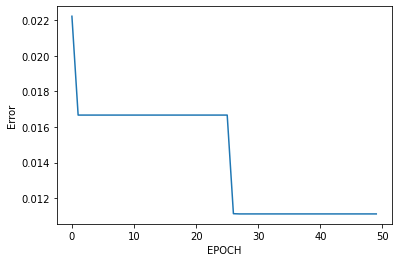

Overall Accuracy98.88888888888889


In [ ]:

eta = 0.001 # learning rate
EPOCHS = 50
Lambda = 0.9 # regularization constant
m = np.array(X_train).shape[0]
def sigmoid(x):
    return 1/(1+2.718**(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))
errors =[]
for i in range(EPOCHS):

    # forward pass
    input_layer = X_train # input layer
    hidden_layer = sigmoid(np.dot(input_layer, wh)) # multiplication of inputs and weights
    output_layer = sigmoid(np.dot(hidden_layer, wo)) # multiplication of inputs and weights

    # Backward pass
    output_layer_error = Y_train - output_layer # ground truth - predicted output
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer) # D1*Z1 Delta * activation(sum weighted output)
    
    hidden_layer_error = output_layer_delta.dot(wo.T) # Backpropogating Gradients
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)  # Backpropogating Gradients
    
    wo += hidden_layer.T.dot(output_layer_delta) * eta + (Lambda/m)*wo
    wh += input_layer.T.dot(hidden_layer_delta) * eta + (Lambda/m)*wh
  
    l2_regu = (np.sum(np.array(wh*wh)) + np.sum(np.array(wo*wo))) * (0.5) * (1/m) * Lambda
    # l2_regu
    error = np.mean(np.abs(output_layer_error)) + (np.abs(sigmoid(l2_regu)))-1
    errors.append(error)
    accuracy = (1 - error) * 100 
    print("EPOCH",i)
    print("error",error)
    # print("accuracy",accuracy)
    print("\n")

plt.plot(errors)
plt.xlabel('EPOCH')
plt.ylabel('Error')
plt.show()
        
print("Overall Accuracy" + str(accuracy))


Answer 2.c comparisons with and without this regularization = 98.88888888888889 (from task 2.c) - 97.32376017678327 (from task 2.a) = 1.56512871211. From this analysis we can say that Overall accuracy increases when used regularization in a controlled manner. Where as without using regularization we got ~97.32% accuracy. (Keeping eta = 0.001
EPOCHS = 50) And with regularization our accuracy is 98.88888888888889

# Task 3

Q3. Use any toolbox in python and implement RBF NNet to solve one of the problems/databases (of your choice from the UCI ML database Repo). Analyze your results with respect to varying learning rate and epochs. You are not allowed to use someone's code available online. UCI databases: https://archive.ics.uci.edu/ml/datasets.php

Date: 18th December 2020

RBF NN is helpful when you want to kernelize the feature vectors so that the data which was not linearly separable in lower dimension will be linearly separable in higher dimensions. We pass the inputs or data points to a function phi which is actually a kind of RBF (There are majorly 3 RBFs: Gaussian, Multi quandartic, Inverse quadratic and inverse multi quadratic)

RBFNN can have exactly one hidden layer.

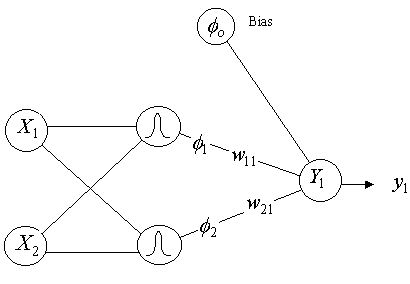

ref: https://towardsdatascience.com/radial-basis-functions-neural-networks-all-we-need-to-know-9a88cc053448 , https://www.kaggle.com/aaditkapoor1201/iris-classification-pytorch

Concept: If we project data into gaussian space with varying sigma, it will give better classification than the linear one. RBF is applied on data itself. RBS is projecting data into higher dim space and activation function is projecting the output into smoother space for taking decisions. Most general RBF is multi gaussian approach. The most general RBF is the most generalized form of RBF function, is Mahanolibs Distance, that is generalized form of Eucledian distance in which we are trying to look at the distribution of the data not just the mean coordinates or cluster K means. We are looking at distance wrt particular distribution. Thats why mu and sigma both have to come in. Here we are talking about mixture of gaussian models and not a single gaussian space. In practical datasets, the dataset space itself have multiple gaussians in which it mught fit in. In place of saying there is abig mu and sigma we say there is a collection of mus and sigmas such that a collection of this is called as Gaussian Mixture Model. There will be different mus and sigmas for mixture. If the data belongs to closer to MU1, it will fit in towards MU1 side and so on. 

RBF falvor of Neural Networks tries to learn minute features and those subclasses of a large class which defines the small structures of a super class. So, start learning the features of different subclasses so that when 2 different kinds of data which will be overlapping with each other is shown to the network, so that NN can understand this example belongs to that subclassversus a different class. So we are trying to learn the underlying distribution of the data itself. When classification is applied on top of that, your network will perform better.

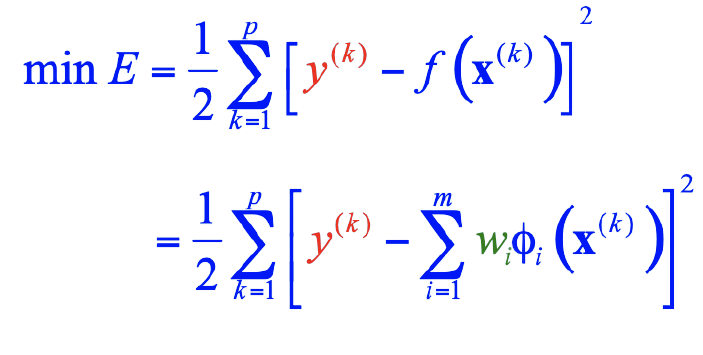

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from sklearn.datasets import load_iris
# import pandas as pd
# data = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/master/Iris.csv')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim,50)
        self.layer2 = nn.Linear(50, 20)
        self.layer3 = nn.Linear(20, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x)) # To check with the loss function
        return x
    

In [ ]:
features, labels = load_iris(return_X_y=True)


In [ ]:
features_train,features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42, shuffle=True)


In [ ]:
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 100

def print_(loss):
    print ("The loss calculated: ", loss)

In [ ]:
# Not using dataloader
x_train, y_train = Variable(torch.from_numpy(features_train)).float(), Variable(torch.from_numpy(labels_train)).long()
for epoch in range(1, epochs+1):
    print ("Epoch #",epoch)
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    print_(loss.item())
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward() # Gradients
    optimizer.step() # Update

Epoch # 1
The loss calculated:  1.1061186790466309
Epoch # 2
The loss calculated:  1.0710843801498413
Epoch # 3
The loss calculated:  1.0439655780792236
Epoch # 4
The loss calculated:  1.0250016450881958
Epoch # 5
The loss calculated:  1.0046954154968262
Epoch # 6
The loss calculated:  0.9810089468955994
Epoch # 7
The loss calculated:  0.9574345946311951
Epoch # 8
The loss calculated:  0.9331005811691284
Epoch # 9
The loss calculated:  0.9098332524299622
Epoch # 10
The loss calculated:  0.8880801796913147
Epoch # 11
The loss calculated:  0.8681461215019226
Epoch # 12
The loss calculated:  0.8503793478012085
Epoch # 13
The loss calculated:  0.8348397016525269
Epoch # 14
The loss calculated:  0.8215042352676392
Epoch # 15
The loss calculated:  0.8090906143188477
Epoch # 16
The loss calculated:  0.7961732745170593
Epoch # 17
The loss calculated:  0.7828192114830017
Epoch # 18
The loss calculated:  0.7690222859382629
Epoch # 19
The loss calculated:  0.7538727521896362
Epoch # 20
The loss c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


Epoch # 80
The loss calculated:  0.5760091543197632
Epoch # 81
The loss calculated:  0.575947105884552
Epoch # 82
The loss calculated:  0.5758880376815796
Epoch # 83
The loss calculated:  0.5758314728736877
Epoch # 84
The loss calculated:  0.5757766366004944
Epoch # 85
The loss calculated:  0.5757220983505249
Epoch # 86
The loss calculated:  0.5756673812866211
Epoch # 87
The loss calculated:  0.5756133794784546
Epoch # 88
The loss calculated:  0.5755605101585388
Epoch # 89
The loss calculated:  0.5755090117454529
Epoch # 90
The loss calculated:  0.5754590034484863
Epoch # 91
The loss calculated:  0.5754097104072571
Epoch # 92
The loss calculated:  0.5753616690635681
Epoch # 93
The loss calculated:  0.5753140449523926
Epoch # 94
The loss calculated:  0.5752672553062439
Epoch # 95
The loss calculated:  0.5752213597297668
Epoch # 96
The loss calculated:  0.5751768350601196
Epoch # 97
The loss calculated:  0.5751344561576843
Epoch # 98
The loss calculated:  0.5750963091850281
Epoch # 99
Th

In [ ]:
x_test = Variable(torch.from_numpy(features_test)).float()
pred = model(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
pred = pred.detach().numpy()


In [ ]:
pred

array([[5.4051077e-07, 9.9946088e-01, 5.3852779e-04],
       [9.9986553e-01, 1.3442989e-04, 1.3968723e-29],
       [2.2209267e-29, 3.9728461e-14, 1.0000000e+00],
       [4.4757115e-07, 9.9873644e-01, 1.2631015e-03],
       [2.0360417e-07, 9.9971610e-01, 2.8365522e-04],
       [9.9974376e-01, 2.5618271e-04, 1.4626053e-27],
       [4.9345585e-04, 9.9950659e-01, 2.3910129e-09],
       [3.5143900e-12, 9.3138525e-03, 9.9068612e-01],
       [5.9949925e-09, 2.7212769e-01, 7.2787237e-01],
       [5.9400598e-05, 9.9994051e-01, 1.4329625e-07],
       [3.0872968e-10, 1.3317394e-01, 8.6682606e-01],
       [9.9949276e-01, 5.0726486e-04, 2.3053540e-25],
       [9.9983394e-01, 1.6603245e-04, 6.8794175e-29],
       [9.9955553e-01, 4.4446572e-04, 8.3692885e-26],
       [9.9980456e-01, 1.9547089e-04, 3.3175371e-28],
       [5.9012319e-07, 9.9993432e-01, 6.5106928e-05],
       [4.3143628e-20, 2.2989106e-08, 1.0000000e+00],
       [3.2938700e-05, 9.9996519e-01, 1.8801826e-06],
       [6.5210128e-07, 9.978

In [ ]:
print ("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))


The accuracy is 0.9736842105263158


# Task 4

Q4. Using MNIST database, code Autoencoder model with three encoding and three decoding layers. Show the visualization of the feature maps. On the features, add a classifier to perform 10-class classification and show the training loss curve and test accuracy.

## First Deep Learning Architecture

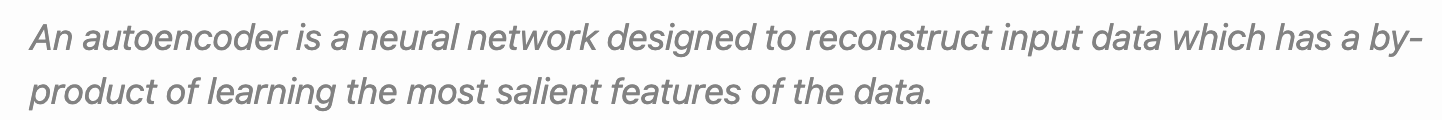

Data compression has been a big problem in computer science. The point where we use data compression in Machine Learning is to reduce or compress over multi dimensional data to lower dimensional data. Additionally, We shall be able to recreate the compressed data.

AutoEncoders are able to learn non linear transformations unlike PCA. Autoencoder need not learn dense layers. High efficiency along with better recreation of compressed data. The modern applications of the autoencoders are Data Denoising, Dim-Reduction for data visualization.

An AENN (Auto Encoder Neural Network) is an unsupervised Machine Learning approach that applies back propogation setting to the target values to be equal to as imnput. There are 3 parts of AEs. Input, Code and Output. Training requires: 1. Code Size 2. Number of Layers 3. Loss Function

Code Size: small size results in more compression

Number of Layer: An AE can have many layers.

Stacked nodes per layer.

Loss Function: MSE or CEL

Practical Appliactions include: Image Colorization, Image Reconstruction. There are other auto encoders available in the market named as: Sparse AEs, Deep AEs, Contractive AEs. We shall not go into deep now. 

AEs are automatically encoding your features. In simple words its a 2 part network. Layer 1 is the data layer. Layer 2 is the first hidden representation. Neuromns of fully connected layer. Layer 3 is data layer which is the reconstruction wrt the features. Converting raw data to feature space into a feature. In PCA we could reconstruct data back from PCs. Can we do this in deep learning architecture too?

If we are lowering the dimenstionality of the input, say from 1X1000 to 1X100 , that is from 1000 components to 100 components, task is to reconstruct the 1000 components again from 100PCs.

The task from layer 2 to layer 3 is reconstruction of data back to its original form or the form which is closer to the input information. The loss function is ||x-X^|| That is output should be as close as input.



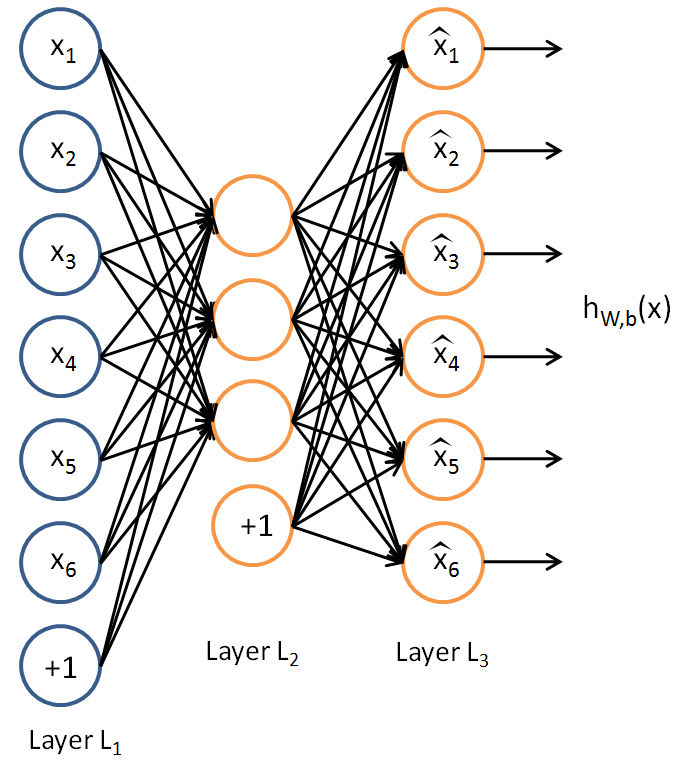

Two parts: Encoding and Decoding.
Input Layer: raw data from X
One Hidden layer(Encoding): Feature learner
Output Layer(Decoding): Reconstrcut imput(x) to a form closer to input which is X^. such that ||x-x^||^2 is minimum. We are trying to learn a lower dimensional representation from input raw data so that from this low dim space if I am able toreconstruct the data back, I shoiuld be able to reconstruct it. Encoder L1 to L2. Decoder L2 to L3.

Our loss function is trying to minimize the difference between X and X^. This one hidden layer network is essential. We get this Neural Network PCA equivalent.

Similar to PCA, here also we dont need the or in other words we dont require the Decoded output. One learned with the proper MSE loss function, we can throw away the decoded output. We know how representation is obtained. Now that we have learned the parameters, we can add classifier on top of the layers in reduced dimenstions. The features are learned such that we can reconstruct the features back to input. Thus layer L2 is the true representation of the imnput data. Even if we get a classifier for inputs we should be able to get at least same performance as that of inner layers. 

We hope that because we have removed al;l theredundant information ad we have learned only useful information, useful features, lower dim important features to be precise, the performance should improve, but lower bound should improve, Lower Bound should be as good as raw data, because its true representation of raw data. This way we freeze the weights between L1 and L2. 

We add another layer *b* fetching input from *a* fully connected. The weights between [a1 a2 and a3] and [b1 b2 b3] will only be trained and learned, since the weights between X and *a* are frozen. In other words can I learn *a* such that [a1 a2 a3] and [b1 b2 b3] are close to each other and minimize the difference between them. While learning a new representation *B* Once we finish the training, we can throw the decoding layer and use [b1 b2 b3] as new classifier. Greedy Layer by Layer training. This way any depth of Neural Network can be learned. Keep on adding mor elayer till we have the lowest representation possible which can help in calssification stage. Greedily every layer is trained independently. And since our hope that reconstruction is optimal that means from using *a* can I reconstruct it back to *X*. from *b* to *a*. If possible reconstruction of *a* is possible from b then possibly reconstruction of X is also possible.
If we do not use this methodology then we keep on increasing multiple parameters and learning lots of parameter in each oteration. Where we train entire network all time. So number of parameters combination reduces significantly on using greedy layer by layer training. Layer by Layer training help multi layer extraction and information.

AEs have capablity that they try to learn features not looking at the class labels but by looking at as if I reconstruct the features back. The unsupervised learning mechanism of learning that representaition of feature embedding that can I get my original features back on reconstruction? Also will the lower dim feature embedding are meaningful or not.

The flavor of Denoising AE is that we are not interested in generating the neighbors of the input dataset, in fact from neighbor we are generating X information or the inputs. Essentially, learning the projection in neighborhood in the viscinity. We are seeking to generate the input data using neighborhood features space. The representationion we onbtain is not just denoised but also more genralized, non linear. Thus overfitting problem taken care of. In other words, de noising AE learns the projection from the neighborhood of a sample in training data.

# lr = 0.1

epoch :1 out of: 10 loss: 136.62542251999676
epoch :2 out of: 10 loss: 0.08578463862836361
epoch :3 out of: 10 loss: 0.08582492607831956
epoch :4 out of: 10 loss: 0.08577296335995198
epoch :5 out of: 10 loss: 0.08575490117073059
epoch :6 out of: 10 loss: 0.08611772644519806
epoch :7 out of: 10 loss: 0.08568179792165756
epoch :8 out of: 10 loss: 0.085670583948493
epoch :9 out of: 10 loss: 0.0857059053182602
epoch :10 out of: 10 loss: 0.08569736893475055


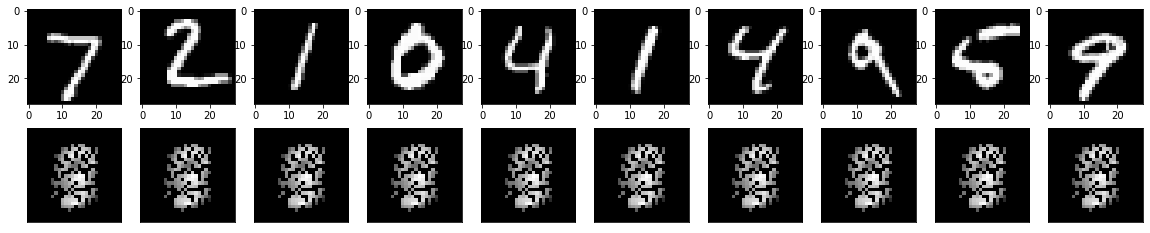

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision




class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(784, 128)
        self.encoder_output_layer = nn.Linear(128, 128)

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = F.relu(activation)
        code = self.encoder_output_layer(activation)
        code = F.relu(code)
        return code


class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder_hidden_layer = nn.Linear(128, 128)
        self.decoder_output_layer = nn.Linear(128, 784)

    def forward(self, features):
        activation = self.decoder_hidden_layer(features)
        activation = F.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = F.relu(activation)
        return reconstructed


class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, features):
        code = self.encoder(features)
        reconstructed = self.decoder(code)
        return reconstructed


transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

X = torchvision.datasets.MNIST(root="~/torch_datasets", train=True, transform=transform, download=True)

Y = torchvision.datasets.MNIST(root="~/torch_datasets", train=False, transform=transform, download=True)

final_X = torch.utils.data.DataLoader(X, batch_size=120, shuffle=True, num_workers=4, pin_memory=True)

final_Y = torch.utils.data.DataLoader(Y, batch_size=40, shuffle=False, num_workers=4)


model = AE()
optimizer = optim.Adam(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

epochs = 10

for epoch in range(epochs):
    loss = 0
    for batch_features, _ in final_X:
        batch_features = batch_features.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(batch_features)
        train_loss = criterion(outputs, batch_features)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    loss = loss / len(final_X)
    print("epoch :"+ str(epoch + 1)+" out of: "+str(epochs)+ " loss: "+ str(loss))

with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(Y.data[index].reshape(28, 28))

        ax = plt.subplot(2, number, index + 1 + number)
        test_data = Y.data[index]
        test_data = test_data
        test_data = test_data.float()
        test_data = test_data.view(-1, 784)
        output = model(test_data)
        plt.imshow(output.cpu().reshape(28, 28))

    plt.show()

# Output lr=0.1

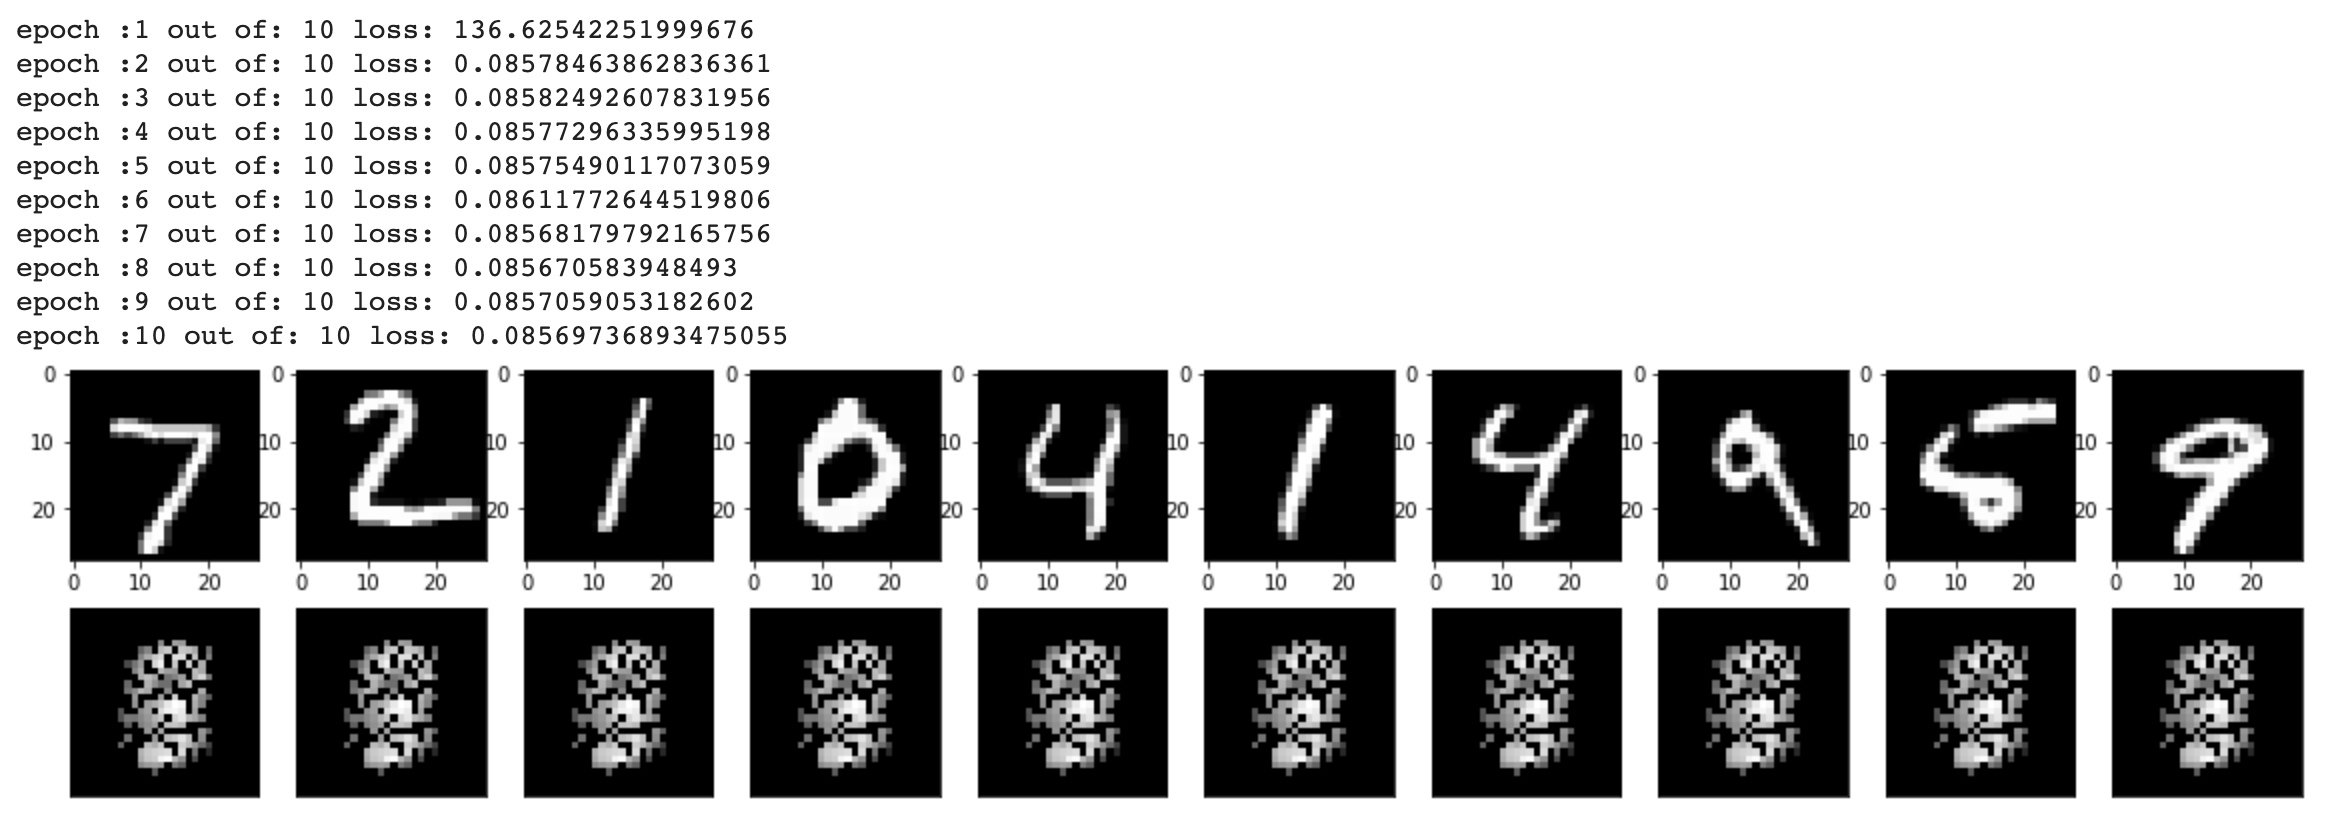

# lr = 0.01

epoch :1 out of: 10 loss: 0.050109347589313985
epoch :2 out of: 10 loss: 0.04413232663273811
epoch :3 out of: 10 loss: 0.04331011784076691
epoch :4 out of: 10 loss: 0.043087582334876064
epoch :5 out of: 10 loss: 0.04294347830116749
epoch :6 out of: 10 loss: 0.042747831270098686
epoch :7 out of: 10 loss: 0.04243143428117037
epoch :8 out of: 10 loss: 0.042204100757837294
epoch :9 out of: 10 loss: 0.04223021601885557
epoch :10 out of: 10 loss: 0.04197726914286613


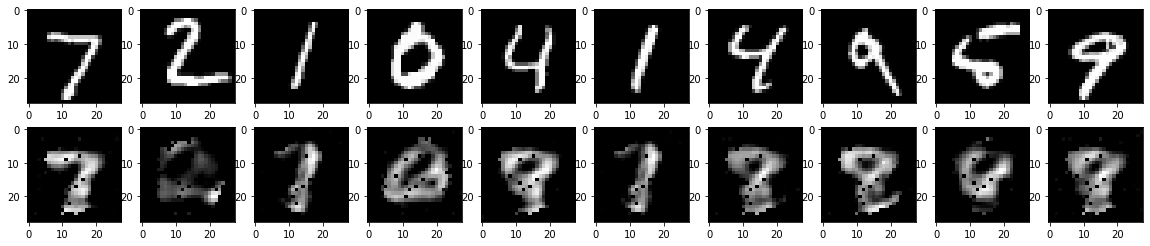

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
import torchvision




class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(784, 128)
        self.encoder_output_layer = nn.Linear(128, 128)

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = F.relu(activation)
        code = self.encoder_output_layer(activation)
        code = F.relu(code)
        return code


class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.decoder_hidden_layer = nn.Linear(128, 128)
        self.decoder_output_layer = nn.Linear(128, 784)

    def forward(self, features):
        activation = self.decoder_hidden_layer(features)
        activation = F.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = F.relu(activation)
        return reconstructed


class AE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, features):
        code = self.encoder(features)
        reconstructed = self.decoder(code)
        return reconstructed


transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

X = torchvision.datasets.MNIST(root="~/torch_datasets", train=True, transform=transform, download=True)

Y = torchvision.datasets.MNIST(root="~/torch_datasets", train=False, transform=transform, download=True)

final_X = torch.utils.data.DataLoader(X, batch_size=120, shuffle=True, num_workers=4, pin_memory=True)

final_Y = torch.utils.data.DataLoader(Y, batch_size=40, shuffle=False, num_workers=4)


model = AE()
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

epochs = 10

for epoch in range(epochs):
    loss = 0
    for batch_features, _ in final_X:
        batch_features = batch_features.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(batch_features)
        train_loss = criterion(outputs, batch_features)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    loss = loss / len(final_X)
    print("epoch :"+ str(epoch + 1)+" out of: "+str(epochs)+ " loss: "+ str(loss))

with torch.no_grad():
    number = 10
    plt.figure(figsize=(20, 4))
    for index in range(number):
        # display original
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(Y.data[index].reshape(28, 28))

        ax = plt.subplot(2, number, index + 1 + number)
        test_data = Y.data[index]
        test_data = test_data
        test_data = test_data.float()
        test_data = test_data.view(-1, 784)
        output = model(test_data)
        plt.imshow(output.cpu().reshape(28, 28))

    plt.show()

# Output lr=0.01

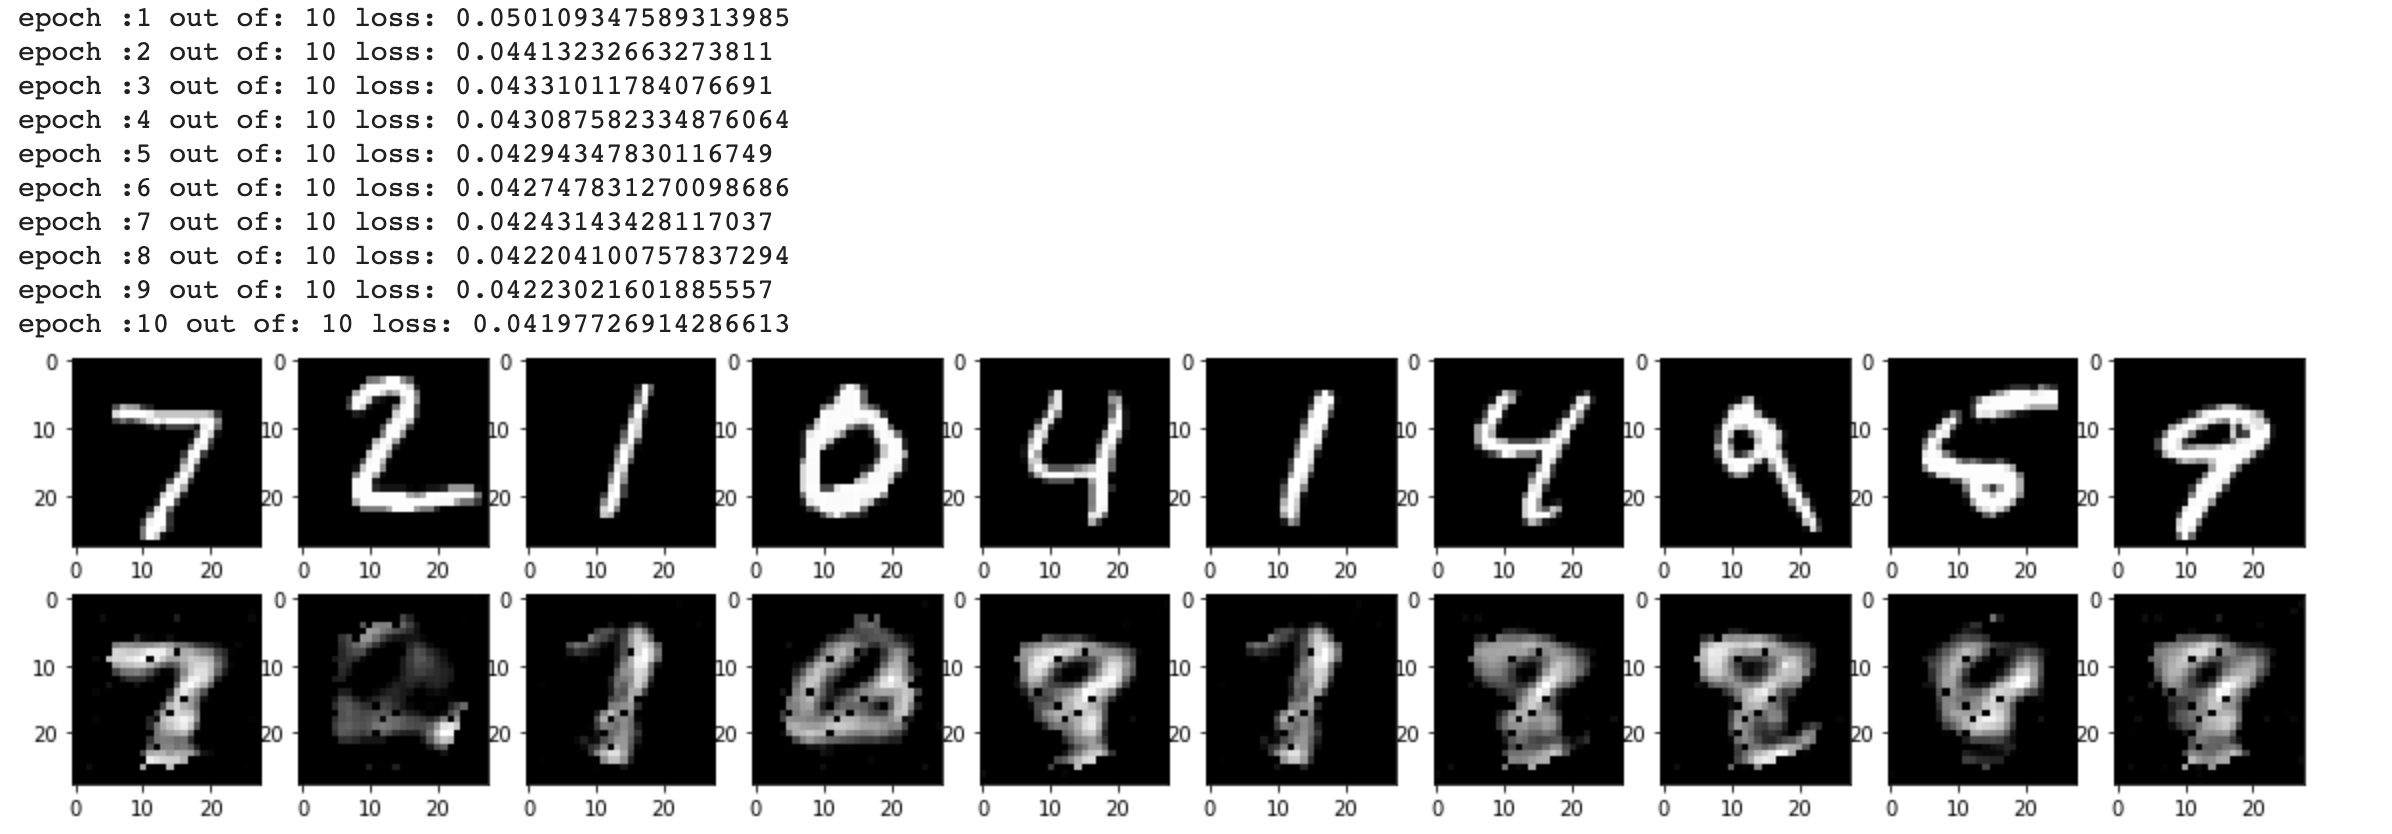

# lr=0.001

With the lr=0.001 we are getting better results in autoencoder. I tried doing with multiple epochs However, the responses were absurd. It demanded for GPU computations. Since we are doing in Colab Notebook, I dont think there might a GPU based computation in free tier of Google Colab. Still we are getting better results.

In [23]:

model = AE()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

epochs = 10

for epoch in range(epochs):
    loss = 0
    for batch_features, iteration in final_X:
        batch_features = batch_features.view(-1, 784)
        optimizer.zero_grad()
        outputs = model(batch_features)
        train_loss = criterion(outputs, batch_features)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    # print(loss)
    print("Epoch Number:"+ str(epoch)+" "+"Loss:"+ str(loss))


Epoch Number:0 Loss:15.397986138239503
Epoch Number:1 Loss:8.511991852894425
Epoch Number:2 Loss:7.618226518854499
Epoch Number:3 Loss:7.132646734826267
Epoch Number:4 Loss:6.830131568014622
Epoch Number:5 Loss:6.619829728268087
Epoch Number:6 Loss:6.468114947900176
Epoch Number:7 Loss:6.333606379106641
Epoch Number:8 Loss:6.229214288294315
Epoch Number:9 Loss:6.139959868974984


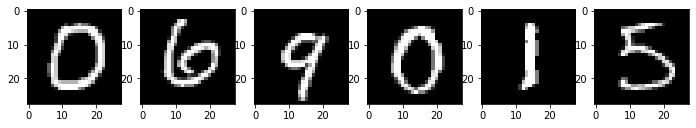

In [34]:

with torch.no_grad(): # refer: https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch
    plt.figure(figsize=(20, 4))
    for index in range(10,16):
        ax = plt.subplot(2, 10, index + 1)
        plt.imshow(Y.data[index].reshape(28, 28))
        # ax = plt.subplot(2, 10, index + 1)
        # YTest = Y.data[index].float().view(-1, 784)
        # plt.imshow(model(YTest).reshape(28, 28))

    plt.show()

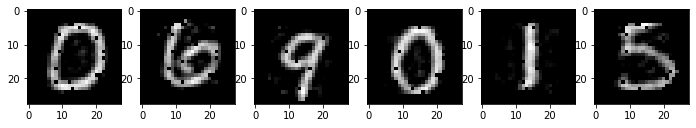

In [35]:

with torch.no_grad(): # refer: https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch
    plt.figure(figsize=(20, 4))
    for index in range(10,16):
        # ax = plt.subplot(2, 10, index + 1)
        # plt.imshow(Y.data[index].reshape(28, 28))
        ax = plt.subplot(2, 10, index + 1)
        YTest = Y.data[index].float().view(-1, 784)
        plt.imshow(model(YTest).reshape(28, 28))

    plt.show()